<a href="https://colab.research.google.com/github/rahuls321/Time-Series-Forecasting-With-Python/blob/master/Moving_Average_Smoothing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


            Births
Date              
1959-01-01      35
1959-01-02      32
1959-01-03      30
1959-01-04      31
1959-01-05      44


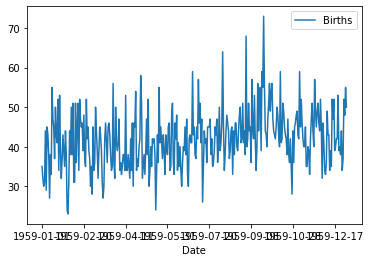

In [2]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('gdrive/My Drive/Colab Notebooks/Forecasting_Datasets/daily-total-female-births.csv', header=0, index_col=0)
print(series.head())
series.plot()
pyplot.show()

##Moving Average as Data Preparation

It used as a data preparation to create smoothed version of the series. It reduces the random variation in the original datasets. Here we use trailing Moving averages with window size of 3.

               Births
Date                 
1959-01-01        NaN
1959-01-02        NaN
1959-01-03  32.333333
1959-01-04  31.000000
1959-01-05  35.000000
1959-01-06  34.666667
1959-01-07  39.333333
1959-01-08  39.000000
1959-01-09  42.000000
1959-01-10  36.000000


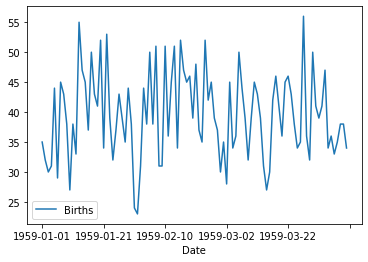

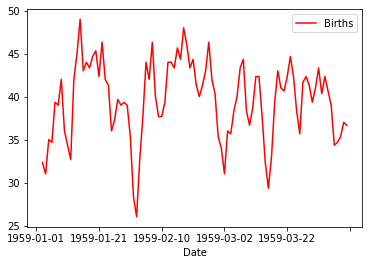

In [7]:
# Tail-rolling average transform
rolling = series.rolling(window=3)
rolling_mean = rolling.mean()
print(rolling_mean.head(10))
# plot original and transformed dataset
series[:100].plot()
rolling_mean[:100].plot(color='red')
pyplot.show()

You can clearly see the difference the sharp variations are now removed. Red graph gives a smoothed version of the original datasets.

##Moving Average as Feature Engineering



In [13]:
from pandas import DataFrame
from pandas import concat
df = DataFrame(series.values)
width = 3
lag1 = df.shift(1)
lag3 = df.shift(width - 1)
window = lag3.rolling(window=width)
means = window.mean()
dataframe = concat([means, lag1, df], axis=1)
dataframe.columns = ['mean', 't-1', 't+1']
print(dataframe.head(10))

        mean   t-1  t+1
0        NaN   NaN   35
1        NaN  35.0   32
2        NaN  32.0   30
3        NaN  30.0   31
4  32.333333  31.0   44
5  31.000000  44.0   29
6  35.000000  29.0   45
7  34.666667  45.0   43
8  39.333333  43.0   38
9  39.000000  38.0   27


Moving average of previous three values and lag1 input features are considered as features subset to predict future values.

##Moving Average as Prediciton

Test MSE of window 1: 84.223
Test MSE of window 2: 66.460
Test MSE of window 3: 61.379
Test MSE of window 4: 58.840
Test MSE of window 5: 56.832
Test MSE of window 6: 55.720
Test MSE of window 7: 53.024
Test MSE of window 8: 52.057


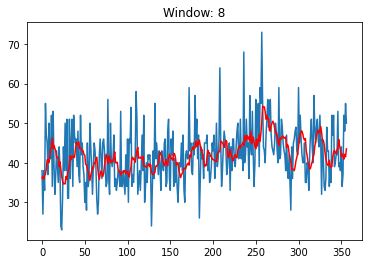

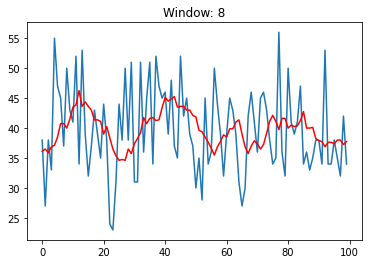

Test MSE of window 9: 52.451
Test MSE of window 10: 52.593
Test MSE of window 11: 52.844


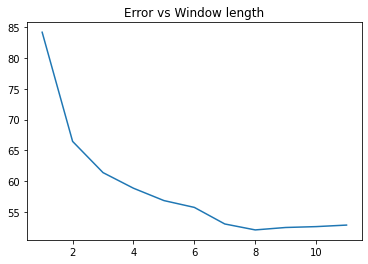

In [44]:
from numpy import mean
import numpy as np
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
# prepare situation
X = series.values
window = 3
error_list=[]
window_list = np.arange(1,12)
for window in window_list:
    history = [X[i] for i in range(window)]
    test = [X[i] for i in range(window, len(X))]
    predictions = list()
    # walk forward over time steps in test
    for t in range(len(test)):
        length = len(history)
        yhat = mean([history[i] for i in range(length-window,length)])
        obs = test[t]
        predictions.append(yhat)
        history.append(obs)
        # if(t<=10):
        #     print('predicted=%f, expected=%f' % (yhat, obs))
    error = mean_squared_error(test, predictions)
    print('Test MSE of window %d: %.3f' % (window, error))
    error_list.append(error)
    if(window == 8):
        pyplot.plot(test)
        pyplot.plot(predictions, color='red')
        pyplot.title('Window: %d' %(window))
        pyplot.show()
        # zoom plot
        pyplot.plot(test[0:100])
        pyplot.plot(predictions[0:100], color='red')
        pyplot.title('Window: %d' %(window))
        pyplot.show()
pyplot.plot(window_list, error_list)
pyplot.title('Error vs Window length')
pyplot.show()

Window length of 8 gives better prediction with comparision to others as it is giving minimum error in between size of 1-12. But still it is not optimized window length.